## Data analysis

#### Imports

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from numpy.linalg import norm
import scipy.integrate as integrate

#### Load data

In [130]:
PATH_TO_DATA = "../data/"

sync_imu = pd.read_csv(PATH_TO_DATA + "sync_imu.csv", encoding="utf-16")
sync_tab = pd.read_csv(PATH_TO_DATA + "sync_tab.csv", encoding="utf-8")

sync_imu_2 = pd.read_csv(PATH_TO_DATA + "sync_imu_2.csv", encoding="utf-8")
sync_tab_2 = pd.read_csv(PATH_TO_DATA + "sync_tab_2.csv", encoding="utf-16")

In [131]:
sync_tab.head(1)

,host_timestamp,x,y,z,in_range,touch,pressure,reset
0,575726755703700,-67.0,669.0,0,0,0,0,0


In [132]:
sync_imu.head(1)

,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature
0,575723892120900,1246180,-3.3535,3.9494,-7.8975,-0.0415,-0.0183,-0.0562,19.16


In [133]:
print("The length of the imu data set is {} and the length of the tablet data set is {}".format(sync_imu.shape[0], sync_tab.shape[0]))

The length of the imu data set is 1804 and the length of the tablet data set is 1056


#### Find tabbing for synchronization

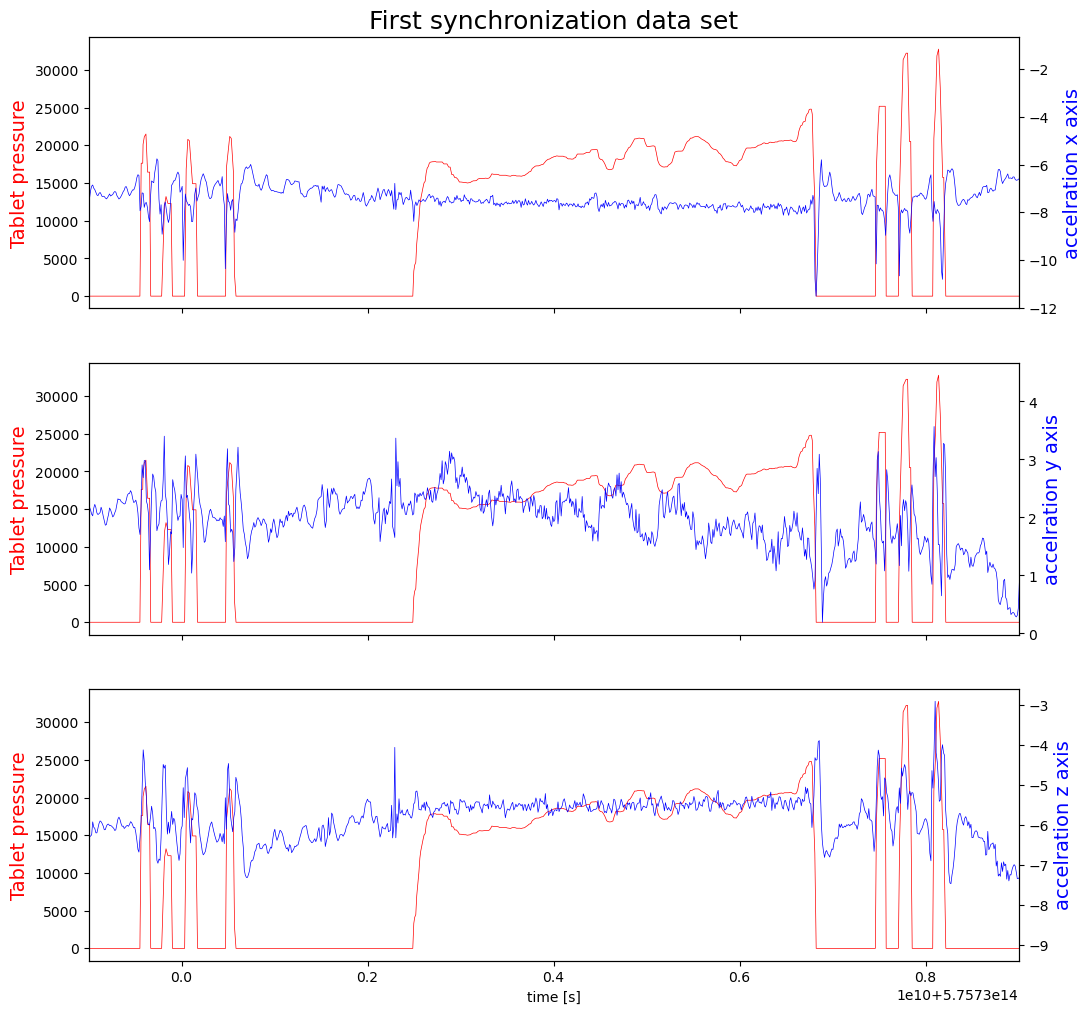

In [134]:
fig,ax = plt.subplots(3,1, sharex=True, figsize=(12, 12))

ax[0].plot(sync_tab.host_timestamp, sync_tab.pressure,
        color="red", linewidth=0.5)
ax[0].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax2=ax[0].twinx()
ax2.plot(sync_imu.host_timestamp, sync_imu.ax,color="blue", linewidth=0.5)
ax2.set_ylabel("accelration x axis",color="blue",fontsize=14)

ax[1].plot(sync_tab.host_timestamp, sync_tab.pressure,
        color="red", linewidth=0.5)
ax[1].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax3=ax[1].twinx()
ax3.plot(sync_imu.host_timestamp, sync_imu.ay,color="blue", linewidth=0.5)
ax3.set_ylabel("accelration y axis",color="blue",fontsize=14)

ax[2].plot(sync_tab.host_timestamp, sync_tab.pressure,
        color="red", linewidth=0.5)
ax[2].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax4=ax[2].twinx()
ax4.plot(sync_imu.host_timestamp, sync_imu.az,color="blue", linewidth=0.5)
ax4.set_ylabel("accelration z axis",color="blue",fontsize=14)

ax[-1].set_xlabel("time [s]")
ax[0].set_title('First synchronization data set',  fontsize=18)
ax[-1].set_xlim(2.9 * 1e10 + 5.757e14, 3.9 * 1e10 + 5.757e14)
plt.show()


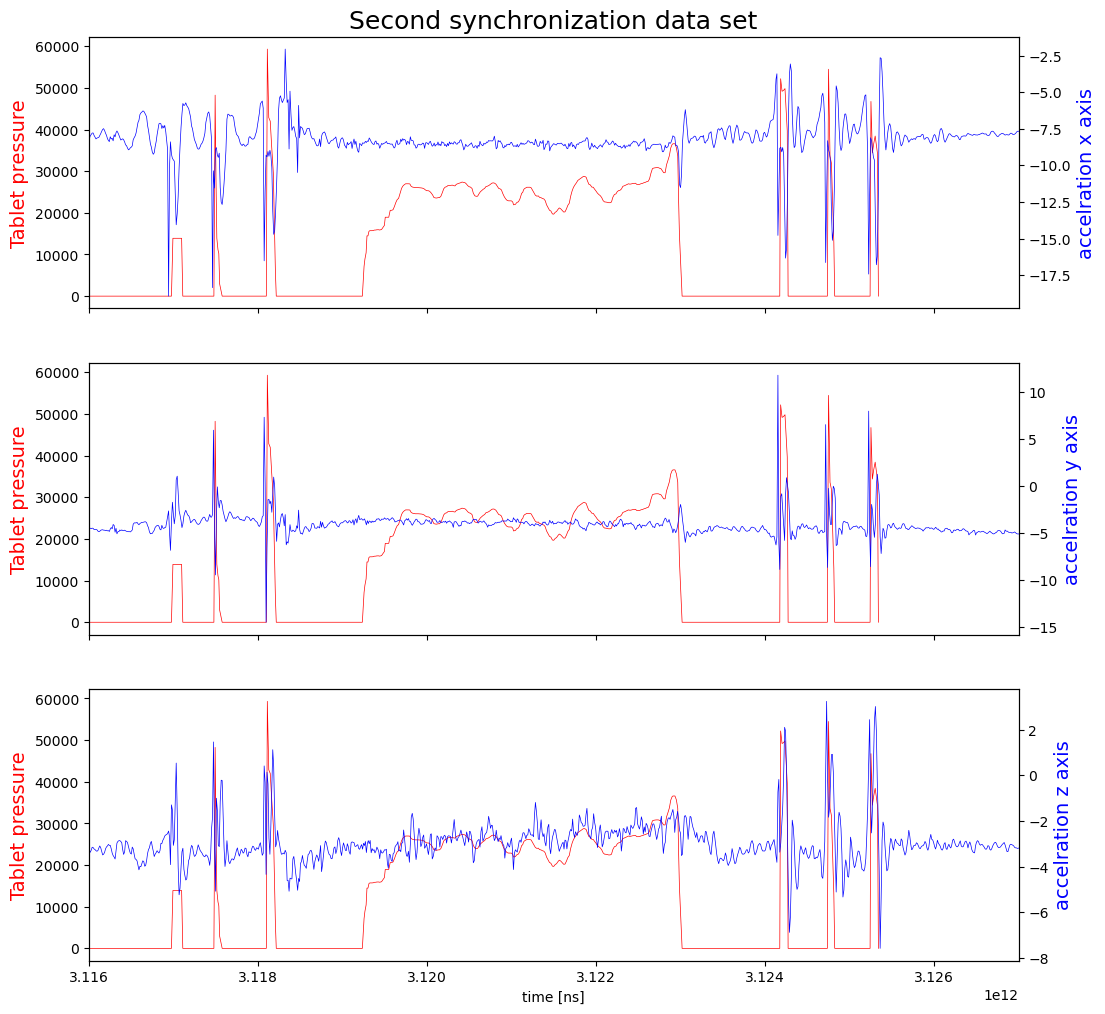

In [135]:
fig,ax = plt.subplots(3,1, sharex=True, figsize=(12, 12))

ax[0].plot(sync_tab_2.host_timestamp, sync_tab_2.pressure,
        color="red", linewidth=0.5)
ax[0].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax2=ax[0].twinx()
ax2.plot(sync_imu_2.host_timestamp, sync_imu_2.ax,color="blue", linewidth=0.5)
ax2.set_ylabel("accelration x axis",color="blue",fontsize=14)

ax[1].plot(sync_tab_2.host_timestamp, sync_tab_2.pressure,
        color="red", linewidth=0.5)
ax[1].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax3=ax[1].twinx()
ax3.plot(sync_imu_2.host_timestamp, sync_imu_2.ay,color="blue", linewidth=0.5)
ax3.set_ylabel("accelration y axis",color="blue",fontsize=14)

ax[2].plot(sync_tab_2.host_timestamp, sync_tab_2.pressure,
        color="red", linewidth=0.5)
ax[2].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax4=ax[2].twinx()
ax4.plot(sync_imu_2.host_timestamp, sync_imu_2.az,color="blue", linewidth=0.5)
ax4.set_ylabel("accelration z axis",color="blue",fontsize=14)

ax[-1].set_xlabel("time [ns]")
ax[0].set_title('Second synchronization data set',  fontsize=18)
ax[-1].set_xlim(3.116 * 1e12, 3.127 * 1e12)
plt.show()

In [136]:
# normalize data

# acc data for z axis
min_az = min(sync_imu.az)
max_az = max(sync_imu.az)
sync_imu['normalized_az'] = (sync_imu.az + abs(min_az)) / (max_az + abs(min_az))

# tablet data
min_pressure = min(sync_tab.pressure)
max_pressure = max(sync_tab.pressure)
sync_tab['normalized_tab_pressure'] = (sync_tab.pressure-min_pressure)/ (max_pressure -min_pressure) 

### Synchronization checks for second data set

#### normalized data

In [137]:
# normalize data

# acc data
min_az = min(sync_imu.az)
max_az = max(sync_imu.az)
sync_imu['normalized_az'] = (sync_imu.az + abs(min_az)) / (max_az + abs(min_az))

min_az_2 = min(sync_imu_2.az)
max_az_2 = max(sync_imu_2.az)
sync_imu_2['normalized_az'] = (sync_imu_2.az + abs(min_az_2)) / (max_az_2 + abs(min_az_2))

# tablet data
min_pressure = min(sync_tab.pressure)
max_pressure = max(sync_tab.pressure)
sync_tab['normalized_tab_pressure'] = (sync_tab.pressure-min_pressure)/ (max_pressure -min_pressure) 

min_pressure_2 = min(sync_tab_2.pressure)
max_pressure_2 = max(sync_tab_2.pressure)
sync_tab_2['normalized_tab_pressure'] = (sync_tab_2.pressure-min_pressure_2)/ (max_pressure_2 -min_pressure_2) 

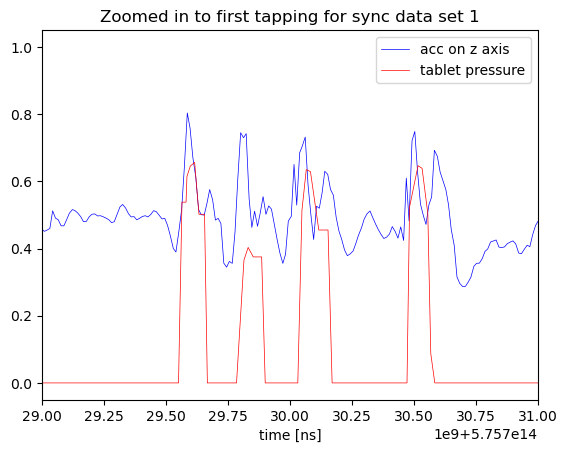

In [138]:
plt.plot(sync_imu.host_timestamp, sync_imu.normalized_az, color="blue", linewidth=0.5,label='acc on z axis')
plt.plot(sync_tab.host_timestamp, sync_tab.normalized_tab_pressure,color="red", linewidth=0.5,label='tablet pressure')
plt.xlim(2.9 * 1e10 + 5.757e14, 3.1 * 1e10+ 5.757e14)
plt.legend()
plt.title('Zoomed in to first tapping for sync data set 1')
plt.xlabel('time [ns]')
plt.show()

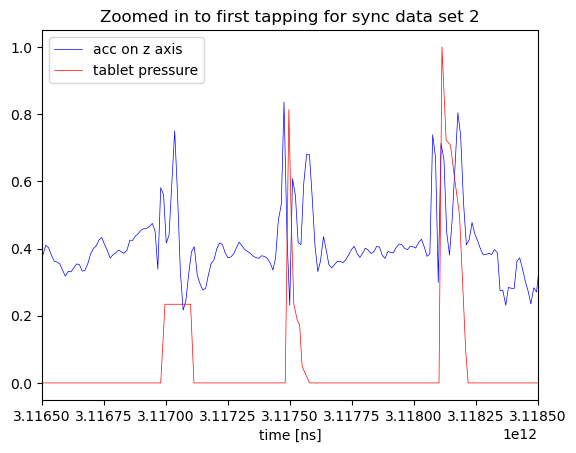

In [139]:
plt.plot(sync_imu_2.host_timestamp, sync_imu_2.normalized_az, color="blue", linewidth=0.5,label='acc on z axis')
plt.plot(sync_tab_2.host_timestamp, sync_tab_2.normalized_tab_pressure,color="red", linewidth=0.5,label='tablet pressure')
plt.xlim(3116500000000, 3118500000000)
plt.title('Zoomed in to first tapping for sync data set 2')
plt.xlabel('time [ns]')
plt.legend()
plt.show()

## Quaternion representation and orientation

The following data set consists of tablet and imu data of the following sequence seperated by three tabs each:
- up and down movement with the spitze pointing downwards (starting with movement up)
- movement from left to right (starting with movement to the left) holding the pen vertical, spitze pointing to the left
- up and down movement with the spitze pointing to the left (starting with movement up)
- letting the pen lay on the tablet, spitze pointing to the left
- turning the pen over from the previous position so that the imu is on the the top and back

In [140]:
import ahrs

In [141]:
PATH_TO_DATA = "../data/"

position_data_imu = pd.read_csv(PATH_TO_DATA + "position_data_imu.csv", encoding="utf-16")
position_data_tab = pd.read_csv(PATH_TO_DATA + "position_data_tab.csv", encoding="utf-8")
position_data_tab.head(1)

,host_timestamp,x,y,z,in_range,touch,pressure,reset
0,361746297380600,-212.0,814.0,0,0,0,0,0


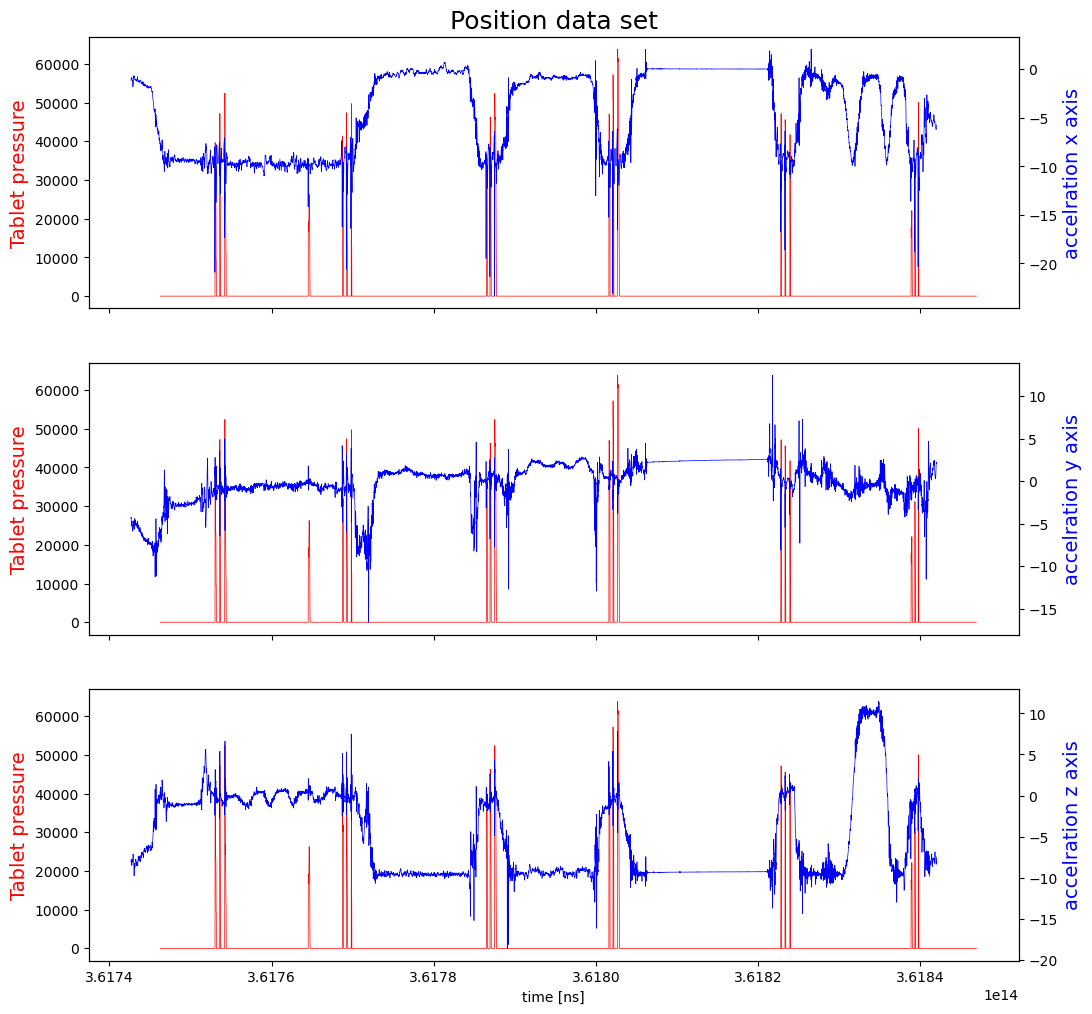

In [142]:
# find tabbing
fig,ax = plt.subplots(3,1, sharex=True, figsize=(12, 12))

ax[0].plot(position_data_tab['host_timestamp'], position_data_tab.pressure,
        color="red", linewidth=0.5)
ax[0].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax2=ax[0].twinx()
ax2.plot(position_data_imu.host_timestamp, position_data_imu.ax,color="blue", linewidth=0.5)
ax2.set_ylabel("accelration x axis",color="blue",fontsize=14)

ax[1].plot(position_data_tab.host_timestamp, position_data_tab.pressure,
        color="red", linewidth=0.5)
ax[1].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax3=ax[1].twinx()
ax3.plot(position_data_imu.host_timestamp, position_data_imu.ay,color="blue", linewidth=0.5)
ax3.set_ylabel("accelration y axis",color="blue",fontsize=14)

ax[2].plot(position_data_tab.host_timestamp, position_data_tab.pressure,
        color="red", linewidth=0.5)
ax[2].set_ylabel("Tablet pressure",
              color="red",
              fontsize=14)
ax4=ax[2].twinx()
ax4.plot(position_data_imu.host_timestamp, position_data_imu.az,color="blue", linewidth=0.5)
ax4.set_ylabel("accelration z axis",color="blue",fontsize=14)

ax[-1].set_xlabel("time [ns]")
ax[0].set_title('Position data set',  fontsize=18)
plt.show()


### Notes
- From the third section where the pen lays still it becomes clear that the z axis is the one pointin downwards since in contrast to the other two axis the gravity impacts this data

In [143]:
# extract rotation data sequence
#rotation_data_tab = position_data_tab[position_data_tab['host_timestamp'].between(3.6182*1e14, 3.6184*1e14, inclusive='both')]
#rotation_data_imu = position_data_imu[position_data_imu['host_timestamp'].between(3.6182*1e14, 3.6184*1e14, inclusive='both')]

rotation_data_tab = position_data_tab[position_data_tab['host_timestamp'].between(3.618*1e14, 3.6182*1e14, inclusive='both')]
rotation_data_imu = position_data_imu[position_data_imu['host_timestamp'].between(3.618*1e14, 3.6182*1e14, inclusive='both')]


In [144]:
# correct data
ACC_OFFSET = [0.00456531,  0.00791233, -0.02643263]
ACC_SCALE = [0.10216491, 0.10159286, 0.10136561] # fix this to keep meters

GYRO_OFFSET = [-0.019417  ,  0.05761032,  0.03028953]

rotation_data_imu[['gx', 'gy', 'gz']] = rotation_data_imu[['gx', 'gy', 'gz']] + GYRO_OFFSET

rotation_data_imu[['ax', 'ay', 'az']] = rotation_data_imu[['ax', 'ay', 'az']] * ACC_SCALE + ACC_OFFSET


C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\281776105.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotation_data_imu[['gx', 'gy', 'gz']] = rotation_data_imu[['gx', 'gy', 'gz']] + GYRO_OFFSET
C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\281776105.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotation_data_imu[['ax', 'ay', 'az']] = rotation_data_imu[['ax', 'ay', 'az']] * ACC_SCALE + ACC_OFFSET


In [145]:
array_acc = rotation_data_imu[['ax', 'ay', 'az']].to_numpy()
array_gyr = rotation_data_imu[['gx', 'gy', 'gz']].to_numpy()

In [146]:
attitude = ahrs.filters.Madgwick(acc=array_acc, gyr=array_gyr)
attitude.Q[0,]

# Johan added corrected the data in quaternion representation

array([ 0.07443899, -0.98049167,  0.01122506,  0.18157345])

In [113]:
rotation_data_imu[['q0','q1','q2','q3']] = attitude.Q
rotation_data_imu.head(1)

C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\3560758995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotation_data_imu[['q0','q1','q2','q3']] = attitude.Q
C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\3560758995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotation_data_imu[['q0','q1','q2','q3']] = attitude.Q
C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\3560758995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,q0,q1,q2,q3
5083,361800007204800,229643,-0.370073,-0.183042,-0.96522,1.234083,0.36791,-0.43881,20.58,0.074439,-0.980492,0.011225,0.181573


In [114]:
def acc_gyr_to_quat(acc, gyr):
    """
    Input: 
        acc: A N x 3 numpy array representing the accelerations
        gyr: A N x 3 numpy array representing the angles
 
    Output: 
        A N x 4 array representing the quaternions
    """
    attitude = ahrs.filters.Madgwick(acc=array_acc, gyr=array_gyr)
    return attitude.Q


def rotation_matrix(q):
    """
    Input:
        Q: A 4 element array representing the quaternion (q0,q1,q2,q3) 
 
    Output:
        3x3 rotation matrix. 
        This rotation matrix converts a point in the local reference 
        frame to a point in the navigation reference frame.
    """

    # divide by norm so we have a unit quaternion

    q0 = q[0] / norm(q)
    q1 = q[1] / norm(q)
    q2 = q[2] / norm(q)
    q3 = q[3] / norm(q)

    R = np.zeros((3,3))
     
    R[0,0] = 1- 2 * (q2 * q2 + q3 * q3) 
    R[0,1] = 2 * (q1 * q2 - q0 * q3)
    R[0,2] = 2 * (q1 * q3 + q0 * q2)
     
    R[1,0] = 2 * (q1 * q2 + q0 * q3)
    R[1,1] = 1 - 2 * (q1 * q1 + q3 * q3) 
    R[1,2] = 2 * (q2 * q3 - q0 * q1)
     
    R[2,0] = 2 * (q1 * q3 - q0 * q2)
    R[2,1] = 2 * (q2 * q3 + q0 * q1)
    R[2,2] = 1 - 2 * (q1 * q1 + q2 * q2) 
                            
    return R

# inverse of R would be navigation to body


def navigation_acc(R, acc):
    """
    Input:
        R: IMU body frame to global frame rotation matrix
        acc: acceleration in the body frame
    Output: 
        array of acceleration in the global frame
    """
    acc_trans = np.transpose(acc)
    gravity = np.transpose([0, 0, 1])
    glob_acc = np.transpose((np.dot(R, acc_trans) - gravity)) * 9.81  # convert to m/s^2

    return R @ acc

# handle gravity



In [ ]:
def integrate( dt, data):
    return integrate.trapezoid(data, x=dt)

# get_vel (acc), then integral (time, acc) = vel then integral (time, vel) = pos

In [ ]:
def calc_pos(acc, dt):
    vel = integrate(acc, dt)
    pos = integrate(vel, dt)

    return pos

In [ ]:
acc = array_acc
gyr = array_gyr

Q = acc_gyr_to_quat(acc, gyr)
R = rotation_matrix(Q)

pos = calc_pos(navigation_acc(R, acc), t)

In [115]:
print(rotation_matrix(attitude.Q[0,]))

# navigation is my desk, body is sensor

[[ 0.93381016 -0.04904445 -0.35439135]
 [ 0.00502013 -0.98866567  0.15004997]
 [-0.35773368 -0.14189728 -0.92297984]]


In [116]:
rotation_matrices = []
for row in range(attitude.Q.shape[0]): 
    rotation_matrices.append(rotation_matrix(attitude.Q[row,]))

rotation_data_imu['rm'] = rotation_matrices

C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\3573231158.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotation_data_imu['rm'] = rotation_matrices


In [117]:
# fix axes
rotation_data_imu.head(1)

,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,q0,q1,q2,q3,rm
5083,361800007204800,229643,-0.370073,-0.183042,-0.96522,1.234083,0.36791,-0.43881,20.58,0.074439,-0.980492,0.011225,0.181573,"[[0.933810160498248, -0.0490444506419848, -0.3..."


In [118]:
# change to fixed frame
acc_diff_frame = []
for i in range(len(rotation_matrices)):
    acc_cor = rotation_matrices[i] @ array_acc[i,]
    acc_diff_frame.append(acc_cor)

acc_diff_frame_df = pd.DataFrame(acc_diff_frame, columns=['ax', 'ay', 'az'])

In [121]:
def f(row):
    acc = [row.ax, row.ay, row.az]
    r = row.rm
    n = r @ acc
    s = pd.Series([n[0],n[1],n[2], r], index=['ax', 'ay', 'az', 'rm'])
    return s
    

rotation_data_imu[['ax', 'ay', 'az', 'rm']] = rotation_data_imu.apply(lambda row: f(row), axis=1)


C:\Users\ann-k\AppData\Local\Temp\ipykernel_6220\1576962740.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rotation_data_imu[['ax', 'ay', 'az', 'rm']] = rotation_data_imu.apply(lambda row: f(row), axis=1)


In [123]:
rotation_data_imu.head(1)

,host_timestamp,arduino_timestamp,ax,ay,az,gx,gy,gz,temperature,q0,q1,q2,q3,rm
5083,361800007204800,229643,0.005465,0.034278,1.04924,1.234083,0.36791,-0.43881,20.58,0.074439,-0.980492,0.011225,0.181573,"[[0.933810160498248, -0.0490444506419848, -0.3..."


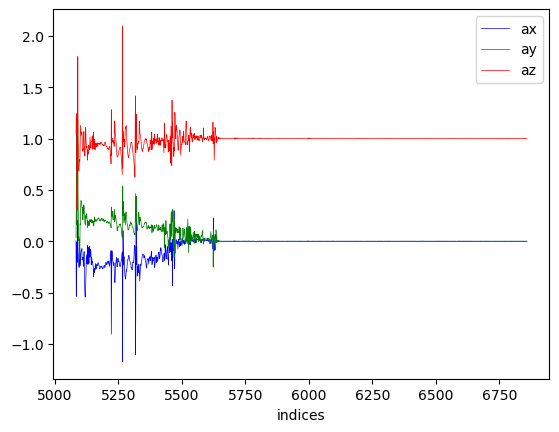

In [128]:
plt.plot(rotation_data_imu.index, rotation_data_imu.ax, c='blue', linewidth=0.5, label = 'ax')
plt.plot(rotation_data_imu.index, rotation_data_imu.ay, c='green',  linewidth=0.5, label = 'ay')
plt.plot(rotation_data_imu.index, rotation_data_imu.az, c='red',  linewidth=0.5, label = 'az')
plt.legend()
plt.xlabel('indices')
plt.show()

# use arduino timestamp for integration, not constant integration step
# check for delay comparison host_timestamp and arduino

In [64]:
# remove gravity
GRAVITY = 1
acc_diff_frame_df.ax.apply(lambda a : a - GRAVITY)

0      -0.994535
1      -1.537213
2      -1.521575
3      -1.106474
4      -1.007357
          ...   
1771   -0.999853
1772   -0.999184
1773   -0.999845
1774   -0.999335
1775   -1.000656
Name: ax, Length: 1776, dtype: float64

In [ ]:
# integrate
def integrate(t, dx):
    for i in range(1, len(x)):
        x = np.zeros_like(dx)
        x[0] = 0
        #dt = t[i] - t[i - 1]
        dt = 1
        x[i] = (dx[i - 1] + dx[i]) / 2 * dt + x[i - 1]
    return None

### Notes 2


#### Notes
- which program was terminated first
- how to determine start of writing sequence -> use in_range or space
- space was used to mark end (reset)

- collect more data (diverse data (balance out letters/letter combis), select sentences)
- decide on set-up
- tab 3 time before writing and after -> check if timestamps match, check for latency
- data collection process should include some checks (tabs)
- track how much time needed (100 sent.)
- common voice data set https://commonvoice.mozilla.org/en (use sent.?)
- imu, synchronization, is it as expected
- quaternion

- use Johans library, feed imu data get quaternion as output, check if axis align (conventions of the library) https://ahrs.readthedocs.io/en/latest/nomenclature.html
- real time 3d visualization of the pen
- ax.quiver matplotlib to visualize orientation

- next time position, integrate twice (see how bad it is)
- The rows of this matrix are the vectors to which the original coordinate axes are transformed by the rotation.

- usual input form of imu data
- look at trace prediction paper